<a href="https://www.kaggle.com/code/preksharathal/brain-tumor?scriptVersionId=263124776" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os

data_path = '/kaggle/input/mri-dataset-for-detection-and-analysis'
print(os.listdir(data_path))


['3D_volumetric_imaging', 'BrainTumorDataPublic', 'MRI_Dataset', 'NINS_Dataset', 'cvind.mat']


In [2]:
dataset_path = '/kaggle/input/mri-dataset-for-detection-and-analysis/NINS_Dataset/NINS_Dataset'
print(os.listdir(dataset_path))







['Cerebral abscess', 'Brain tumor - Recurrenceremnant of previous lesion', 'Stroke (Demyelination)', 'Brain tumor operated with ventricular hemorrhage', 'Microvascular ischemic change', 'demyelinating lesions', 'Encephalomalacia with gliotic change', 'Cerebral Hemorrhage', 'Brain Infection with abscess', 'Post-operative Status with Small Hemorrhage', 'Brain Tumor', 'NMOSD  ADEM', 'Stroke (Haemorrhage)', 'Hemorrhagic collection', 'Brain Atrophy', 'Brain Tumor (Hemangioblastoma  Pleomorphic xanthroastrocytoma  metastasis)', 'Brain tumor (Dermoid cyst craniopharyngioma)', 'small meningioma', 'Malformation (Chiari I)', 'models', 'Obstructive Hydrocephalus', 'Normal', 'pituitary tumor', 'Mid triventricular hydrocephalus', 'cerebral venous sinus thrombosis', 'Brain Tumor (Ependymoma)', 'Stroke(infarct)', 'focal pachymeningitis', 'meningioma', 'Brain Infection', 'Small Vessel Diease Demyelination', 'Brain tumor (Astrocytoma Ganglioglioma)', 'Leukoencephalopathy with subcortical cysts', 'Gliom

In [3]:
all_folders = all_folders = os.listdir(dataset_path)

relevant_folders = []
for folder in all_folders:
    folder_lower = folder.lower()
    if (folder == "Normal" or 
        "brain tumor" in folder_lower or 
        "glioma" in folder_lower or 
        "pituitary tumor" in folder_lower or 
        "meningioma" in folder_lower):
        relevant_folders.append(folder)

print(relevant_folders)

['Brain tumor - Recurrenceremnant of previous lesion', 'Brain tumor operated with ventricular hemorrhage', 'Brain Tumor', 'Brain Tumor (Hemangioblastoma  Pleomorphic xanthroastrocytoma  metastasis)', 'Brain tumor (Dermoid cyst craniopharyngioma)', 'small meningioma', 'Normal', 'pituitary tumor', 'Brain Tumor (Ependymoma)', 'meningioma', 'Brain tumor (Astrocytoma Ganglioglioma)', 'Glioma']


In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(columns=["filepath", "label"])

for folder in relevant_folders:
    full_folder_path = os.path.join(dataset_path, folder)
    
    
    label = "0" if folder == "Normal" else "1"
    
    if os.path.exists(full_folder_path):
        for filename in os.listdir(full_folder_path):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  
                file_path = os.path.join(full_folder_path, filename)  
                df.loc[len(df)] = [file_path, label]
    

In [6]:
df.head()

,filepath,label
0,/kaggle/input/mri-dataset-for-detection-and-an...,1
1,/kaggle/input/mri-dataset-for-detection-and-an...,1
2,/kaggle/input/mri-dataset-for-detection-and-an...,1
3,/kaggle/input/mri-dataset-for-detection-and-an...,1
4,/kaggle/input/mri-dataset-for-detection-and-an...,1


In [7]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

from tensorflow.keras.callbacks import EarlyStopping

2025-09-21 10:03:47.335002: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758449027.714188      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758449027.820892      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [8]:
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepath',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale'
)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepath',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    color_mode='grayscale',
    shuffle=False
)

Found 1972 validated image filenames belonging to 2 classes.
Found 493 validated image filenames belonging to 2 classes.


In [11]:


def AlexNet():
    inp = layers.Input((150, 150, 1))

    x = layers.Conv2D(64, 5, strides=1, padding='same', activation='relu')(inp)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=4, strides=4)(x)  

    x = layers.Conv2D(256, 3, strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=4, strides=4)(x)  

    x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(256, 3, padding='same', activation='relu')(x)
    x = layers.Conv2D(128, 3, padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=4, strides=4)(x) 

    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    out = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=inp, outputs=out)
    return model

model = AlexNet()
model.summary()


I0000 00:00:1758449052.949314      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758449052.950138      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 150, 150, 64)   │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 37, 37, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 37, 37, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 9, 9, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 9, 128)      │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,020,097 (7.71 MB)

 Trainable params: 2,019,457 (7.70 MB)

 Non-trainable params: 640 (2.50 KB)

In [12]:

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])


In [13]:
from tensorflow.keras.callbacks import EarlyStopping

In [14]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1758449059.894542      62 service.cc:148] XLA service 0x7f43ac0062d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758449059.896762      62 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758449059.896784      62 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758449060.517144      62 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/62 ━━━━━━━━━━━━━━━━━━━━ 11:32 11s/step - accuracy: 0.4688 - loss: 1.3671

I0000 00:00:1758449066.649608      62 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 ━━━━━━━━━━━━━━━━━━━━ 35s 385ms/step - accuracy: 0.6472 - loss: 0.8815 - val_accuracy: 0.7099 - val_loss: 0.6085
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.7020 - loss: 0.6202 - val_accuracy: 0.7099 - val_loss: 0.6199
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.6920 - loss: 0.6371 - val_accuracy: 0.7099 - val_loss: 0.6001
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.7070 - loss: 0.6133 - val_accuracy: 0.7099 - val_loss: 0.6076
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 149ms/step - accuracy: 0.7299 - loss: 0.6066 - val_accuracy: 0.7099 - val_loss: 0.6112
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.7128 - loss: 0.6088 - val_accuracy: 0.7099 - val_loss: 0.6106
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.7058 - loss: 0.6125 - val_accuracy: 0.7099 - val_loss: 0.6115
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 151ms/step - accuracy: 0.7218 - loss: 0.6016 - val_accuracy: 0.7099 - val

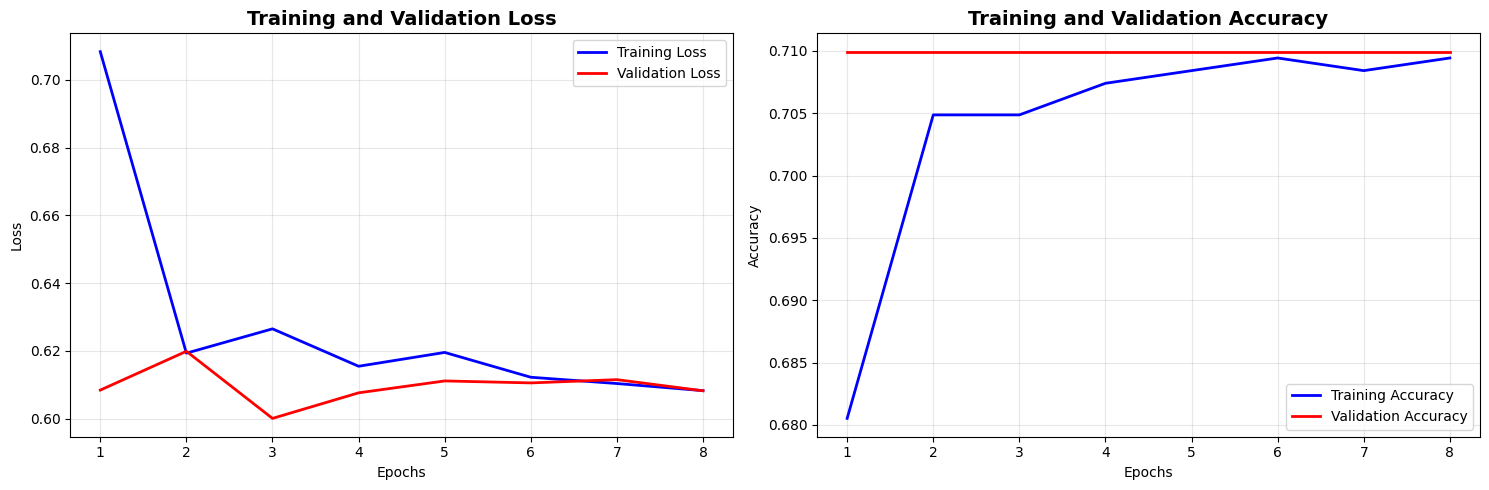

In [15]:
import matplotlib.pyplot as plt
def plot_training_curves(history, figsize=(15, 5)):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(train_loss) + 1)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)


    ax1.plot(epochs, train_loss, 'b-', label='Training Loss', linewidth=2)
    ax1.plot(epochs, val_loss, 'r-', label='Validation Loss', linewidth=2)
    ax1.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    
    ax2.plot(epochs, train_acc, 'b-', label='Training Accuracy', linewidth=2)
    ax2.plot(epochs, val_acc, 'r-', label='Validation Accuracy', linewidth=2)
    ax2.set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

plot_training_curves(history, figsize=(15, 5))